In [1]:
#相關係數(correlation)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = {'年廣告費投入':[12.5, 15.3, 23.2, 26.4, 33.5, 34.4, 39.4, 45.2, 55.4, 60.9],
        '月均銷售額':[21.2, 23.9, 32.9, 34.1, 42.5, 43.2, 49.0, 52.8, 59.4, 63.5]}
dataFrame = pd.DataFrame(data,
                         index=[2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
dataFrame

,年廣告費投入,月均銷售額
2011,12.5,21.2
2012,15.3,23.9
2013,23.2,32.9
2014,26.4,34.1
2015,33.5,42.5
2016,34.4,43.2
2017,39.4,49.0
2018,45.2,52.8
2019,55.4,59.4
2020,60.9,63.5


In [3]:
dataFrame['年廣告費投入'].corr(dataFrame['月均銷售額'])

0.9941983762371884

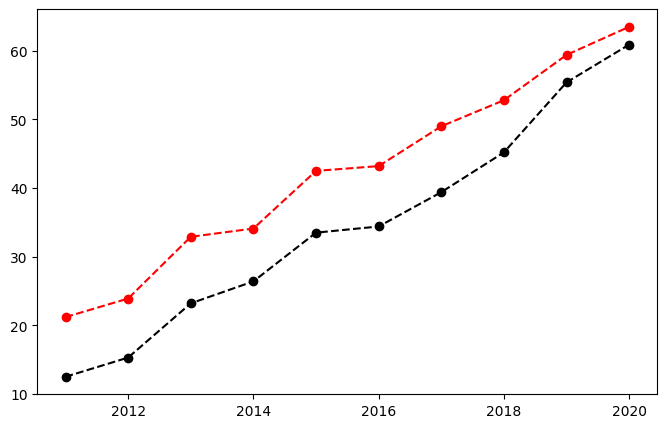

In [4]:
figure = plt.figure(figsize=(8,5))
axes = figure.add_subplot(1,1,1)
axes.plot(dataFrame.index,dataFrame['年廣告費投入'],'ko--')
axes.plot(dataFrame.index,dataFrame['月均銷售額'],'ro--')
plt.show()

In [6]:
import yfinance as yf
data = yf.download("AAPL", start="2022-01-01")
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.190979,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.904053,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.171844,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.281006,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.449310,86709100
...,...,...,...,...,...,...
2023-10-16,176.750000,179.080002,176.509995,178.720001,178.720001,52517000
2023-10-17,176.649994,178.419998,174.800003,177.149994,177.149994,57549400
2023-10-18,175.580002,177.580002,175.110001,175.839996,175.839996,54764400


In [9]:
#台積電(2330.TW),聯電(2303.TW),聯發科(2454.TW),鴻海(2317.TW)
tw2330 = yf.download("2330.TW", start="2022-01-01")
tw2303 = yf.download("2303.TW", start="2022-01-01")
tw2454 = yf.download("2454.TW", start="2022-01-01")
tw2317 = yf.download("2317.TW", start="2022-01-01")
tw2330['Adj Close'],tw2303['Adj Close'],tw2454['Adj Close'],tw2317['Adj Close']

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


(Date
 2022-01-03    607.793213
 2022-01-04    631.873718
 2022-01-05    626.094421
 2022-01-06    620.315125
 2022-01-07    610.682800
                  ...    
 2023-10-17    551.000000
 2023-10-18    540.000000
 2023-10-19    546.000000
 2023-10-20    556.000000
 2023-10-23    544.000000
 Name: Adj Close, Length: 436, dtype: float64,
 Date
 2022-01-03    55.519875
 2022-01-04    55.169590
 2022-01-05    55.257156
 2022-01-06    54.906876
 2022-01-07    54.819305
                 ...    
 2023-10-17    48.200001
 2023-10-18    48.450001
 2023-10-19    49.299999
 2023-10-20    48.700001
 2023-10-23    48.599998
 Name: Adj Close, Length: 436, dtype: float64,
 Date
 2022-01-03    944.696411
 2022-01-04    957.018494
 2022-01-05    965.233276
 2022-01-06    932.374329
 2022-01-07    903.622681
                  ...    
 2023-10-17    825.000000
 2023-10-18    813.000000
 2023-10-19    830.000000
 2023-10-20    828.000000
 2023-10-23    821.000000
 Name: Adj Close, Length: 436, dtype: flo

In [11]:
dataFrame = pd.concat([tw2330['Adj Close'],tw2303['Adj Close'],tw2454['Adj Close'],tw2317['Adj Close']],
          axis=1)
dataFrame.columns = ['台積電','聯電','聯發科','鴻海']

In [13]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 436 entries, 2022-01-03 to 2023-10-23
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   台積電     436 non-null    float64
 1   聯電      436 non-null    float64
 2   聯發科     436 non-null    float64
 3   鴻海      436 non-null    float64
dtypes: float64(4)
memory usage: 17.0 KB


In [16]:
pctChange = dataFrame.pct_change()
pctChange

,台積電,聯電,聯發科,鴻海
Date,,,,
2022-01-03,NaN,NaN,NaN,NaN
2022-01-04,0.039620,-0.006309,0.013043,0.004854
2022-01-05,-0.009146,0.001587,0.008584,0.053140
2022-01-06,-0.009231,-0.006339,-0.034042,-0.018349
2022-01-07,-0.015528,-0.001595,-0.030837,-0.004673
...,...,...,...,...
2023-10-17,0.011009,0.022269,-0.017857,-0.004673
2023-10-18,-0.019964,0.005187,-0.014545,-0.009390
2023-10-19,0.011111,0.017544,0.020910,-0.018957


In [20]:
shift = dataFrame - dataFrame.shift(1)
shift

,台積電,聯電,聯發科,鴻海
Date,,,,
2022-01-03,NaN,NaN,NaN,NaN
2022-01-04,24.080505,-0.350285,12.322083,0.453560
2022-01-05,-5.779297,0.087566,8.214783,4.989143
2022-01-06,-5.779297,-0.350281,-32.858948,-1.814232
2022-01-07,-9.632324,-0.087570,-28.751648,-0.453560
...,...,...,...,...
2023-10-17,6.000000,1.049999,-15.000000,-0.500000
2023-10-18,-11.000000,0.250000,-12.000000,-1.000000
2023-10-19,6.000000,0.849998,17.000000,-2.000000


In [23]:
pctChange[1:].corr()

,台積電,聯電,聯發科,鴻海
台積電,1.000000,0.664691,0.611223,0.408496
聯電,0.664691,1.000000,0.587939,0.401622
聯發科,0.611223,0.587939,1.000000,0.374845
鴻海,0.408496,0.401622,0.374845,1.000000
